# Review Classification

In [35]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

In [36]:
df_1=pd.read_csv("Laptop Rating_cleaned.csv")
df_2=pd.read_csv("Smartphone Rating_cleaned.csv")
df_3=pd.read_csv("Headphone Rating_cleaned.csv")
df_4=pd.read_csv("Smart watch Rating_cleaned.csv")
df_5=pd.read_csv("DSLR Rating_cleaned.csv")
df_6=pd.read_csv("Printer Rating_cleaned.csv")
df_7=pd.read_csv("Monitor Rating_cleaned.csv")
df_8=pd.read_csv("Home theatre Rating_cleaned.csv")
df_9=pd.read_csv("Router Rating_cleaned.csv")

df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9])
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,4.0,Delightful,Its Budget Friendly. And good .,Laptop
1,1,5.0,Simply awesome,nicely designed,Laptop
2,2,1.0,Don't waste your money,very bad qulity,Laptop
3,3,2.0,Expected a better product,It's the second day of my purchase and chargin...,Laptop
4,4,4.0,Pretty good,PRODUCT IS VERY GOOD,Laptop


* Before we begin further processing let's shuffle the data set and drop the non necessary column: 'Unnamed: 0'

In [37]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,2441,5.0,Terrific purchase,Nice😊👌☺️,Smartphone
1,2835,4.0,Nice product,totely good setup,Smartphone
2,859,1.0,Unsatisfactory,No longer battery,Smart watch
3,2884,1.0,Terrible product,Not at all useful. Works same as a single ante...,Router
4,1250,4.0,Delightful,"Everything is fine, awesome product. 🤩",Laptop


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [38]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Terrific purchase,Nice😊👌☺️,Smartphone
1,4.0,Nice product,totely good setup,Smartphone
2,1.0,Unsatisfactory,No longer battery,Smart watch
3,1.0,Terrible product,Not at all useful. Works same as a single ante...,Router
4,4.0,Delightful,"Everything is fine, awesome product. 🤩",Laptop


# Exploratory Data Analysis

In [39]:
#check the dimensions of the data (Headphone)
df.shape

(31435, 4)

#### Observations
* The dataset has 31435 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [40]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [41]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [42]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [43]:
#dropping all numm values
df.dropna(inplace=True)

In [44]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [45]:
df.shape

(31435, 4)

#### Observations:
* There are 31435 rows in the dataset

In [46]:
df['Rating'].value_counts()

5.0    8304
4.0    8100
1.0    7405
3.0    5145
2.0    2481
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 and 4 star.

In [47]:
#check number of unique values in each class;
df.nunique()

Rating         5
Heading      963
Review     28872
Product        9
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [48]:
df.drop_duplicates(subset='Review', inplace=True)

In [49]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(28872, 4)
Rating         5
Heading      955
Review     28872
Product        9
dtype: int64


#### Observations:
* We have 28872 unique reviews for laptops
* There are only 956 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [50]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Terrific purchase,Nice😊👌☺️,Smartphone,8
1,4.0,Nice product,totely good setup,Smartphone,17
2,1.0,Unsatisfactory,No longer battery,Smart watch,17
3,1.0,Terrible product,Not at all useful. Works same as a single ante...,Router,57
4,4.0,Delightful,"Everything is fine, awesome product. 🤩",Laptop,38


In [51]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [52]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Great product,Ink capacity is low,Printer,19
1,5.0,Terrific purchase,Good Photo,DSLR,10
2,1.0,Not recommended at all,Very very bad 👎 mobile in my life please dont ...,Smartphone,141
3,1.0,Don't waste your money,"Don't take this laptop, you'll regret it later...",Laptop,107
4,5.0,Perfect product!,Veerry good,Smartphone,11


### Exploratory Data Analysis

In [53]:
#check the dimensions of the data
df.shape

(28872, 5)

#### Observtions:
* The dataset has 28872 rows and 4 columns

In [54]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [55]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [56]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [57]:
df['Rating'].value_counts()

4.0    7608
1.0    7105
5.0    6820
3.0    4939
2.0    2400
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [58]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [59]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,5.0,Great product,Ink capacity is low,Printer,19,0,0,0,0,1
1,5.0,Terrific purchase,Good Photo,DSLR,10,0,0,0,0,1
2,1.0,Not recommended at all,Very very bad 👎 mobile in my life please dont ...,Smartphone,141,1,0,0,0,0
3,1.0,Don't waste your money,"Don't take this laptop, you'll regret it later...",Laptop,107,1,0,0,0,0
4,5.0,Perfect product!,Veerry good,Smartphone,11,0,0,0,0,1
5,3.0,Just okay,Not good sound quality,Home theatre,22,0,0,1,0,0
6,4.0,Nice product,"Using for last 2 days , good but only better f...",Router,146,0,0,0,1,0
7,4.0,Very Good,Perfect product at this price,Laptop,29,0,0,0,1,0
8,4.0,Wonderful,Good for this price range,Smartphone,25,0,0,0,1,0
9,4.0,Good choice,"Speaker, sound will buffering.",Home theatre,30,0,0,0,1,0


In [60]:
df.drop(['Rating'], axis=1, inplace= True)

In [61]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,28872.000000,28872.000000,28872.000000,28872.000000,28872.000000,28872.000000
mean,67.640932,0.246086,0.083126,0.171065,0.263508,0.236215
std,92.547948,0.430737,0.276077,0.376573,0.440543,0.424763
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [62]:
#checking the skewness
df.skew()

Review_word_counter    2.822668
1 Star                 1.179056
2 Star                 3.020200
3 Star                 1.747113
4 Star                 1.073713
5 Star                 1.242119
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [63]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 67.6


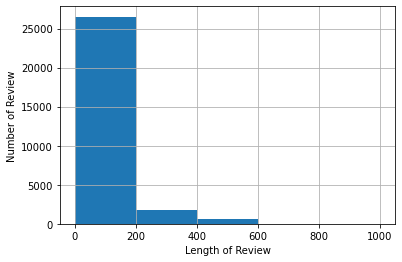

In [64]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 67.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

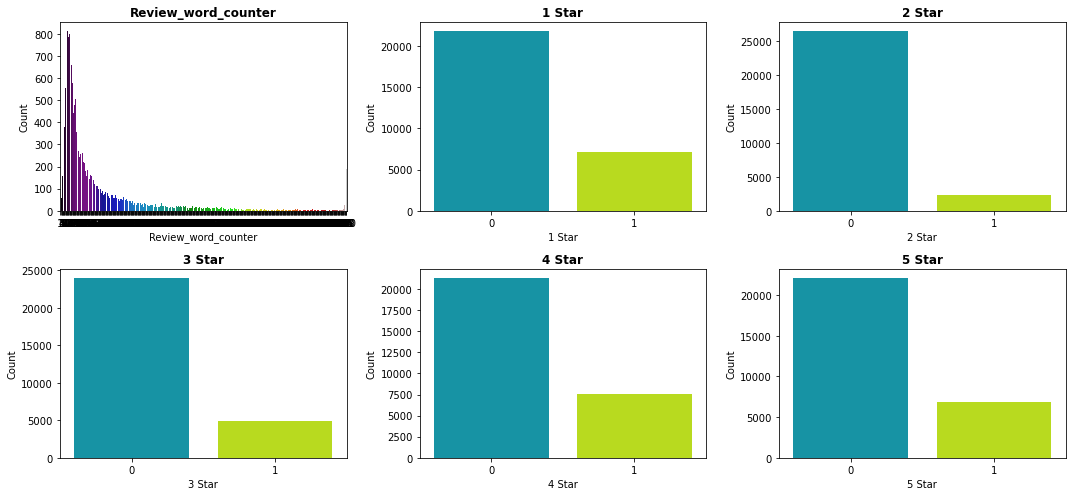

In [65]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
* 2 star rated reviews are least in number

In [66]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [67]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


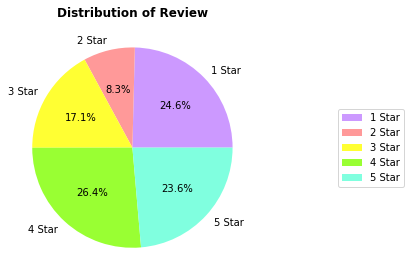

In [68]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 4 Star rating had the highest share of 26.4%, followed by 5 star with 23.6%.
* 2 Star rating has least share with 8.3%

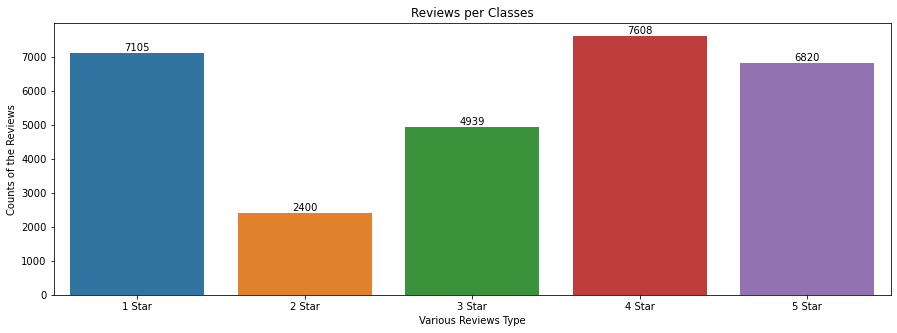

In [69]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 7608 4 Star rated reviews which are maximum. 
* 1 Star reviews were second highest with count of 7106
* 2 Star ratings have the least count of only 2400.

##  Data Pre-Processing

In [70]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capacity is low,Printer,19,0,0,0,0,1
1,terrific purchase,good photo,DSLR,10,0,0,0,0,1
2,not recommended at all,very very bad 👎 mobile in my life please dont ...,Smartphone,141,1,0,0,0,0
3,don't waste your money,"don't take this laptop, you'll regret it later...",Laptop,107,1,0,0,0,0
4,perfect product!,veerry good,Smartphone,11,0,0,0,0,1


In [71]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capacity is low,Printer,19,0,0,0,0,1
1,terrific purchase,good photo,DSLR,10,0,0,0,0,1
2,not recommended at all,very very bad 👎 mobile in my life please dont ...,Smartphone,141,1,0,0,0,0
3,don't waste your money,"don't take this laptop, you'll regret it later...",Laptop,107,1,0,0,0,0
4,perfect product!,veerry good,Smartphone,11,0,0,0,0,1


In [72]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capacity is low,Printer,19,0,0,0,0,1
1,terrific purchase,good photo,DSLR,10,0,0,0,0,1
2,not recommended at all,very very bad 👎 mobile in my life please dont ...,Smartphone,141,1,0,0,0,0
3,dont waste your money,dont take this laptop youll regret it later ...,Laptop,107,1,0,0,0,0
4,perfect product,veerry good,Smartphone,11,0,0,0,0,1


In [73]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capacity is low,Printer,19,0,0,0,0,1
1,terrific purchase,good photo,DSLR,10,0,0,0,0,1
2,not recommended at all,very very bad mobile in my life please dont ...,Smartphone,141,1,0,0,0,0
3,dont waste your money,dont take this laptop youll regret it later i ...,Laptop,107,1,0,0,0,0
4,perfect product,veerry good,Smartphone,11,0,0,0,0,1


In [74]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [75]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capacity low,Printer,19,0,0,0,0,1
1,terrific purchase,good photo,DSLR,10,0,0,0,0,1
2,recommended all,bad mobile life please dont buy tecno m...,Smartphone,141,1,0,0,0,0
3,dont waste money,dont take laptop youll regret later take ...,Laptop,107,1,0,0,0,0
4,perfect product,veerry good,Smartphone,11,0,0,0,0,1


In [76]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capac low,Printer,19,0,0,0,0,1
1,terrif purchas,good photo,DSLR,10,0,0,0,0,1
2,recommend all,bad mobil life pleas dont buy tecno mobil netw...,Smartphone,141,1,0,0,0,0
3,dont wast money,dont take laptop youll regret later take servi...,Laptop,107,1,0,0,0,0
4,perfect product,veerri good,Smartphone,11,0,0,0,0,1


In [77]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,great product,ink capac low,Printer,19,0,0,0,0,1
1,terrif purchas,good photo,DSLR,10,0,0,0,0,1
2,recommend all,bad mobil life pleas dont buy tecno mobil netw...,Smartphone,141,1,0,0,0,0
3,dont wast money,dont take laptop youll regret later take servi...,Laptop,107,1,0,0,0,0
4,perfect product,veerri good,Smartphone,11,0,0,0,0,1


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [78]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(835, 9)

In [79]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [80]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,help,tell scan use canon pixma mg one inkjet printe...,Printer,154,0,1,0,0,0
1,total wastag money,buy product total wastag money old basic netge...,Router,509,1,0,0,0,0
2,good product wart,purchas product read mani posit review flipkar...,Printer,510,0,0,0,1,0
3,useless product,bad qualiti work,Router,27,1,0,0,0,0
4,nice product valu money,good mobil,Smartphone,11,0,0,0,1,0


In [81]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [82]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [83]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



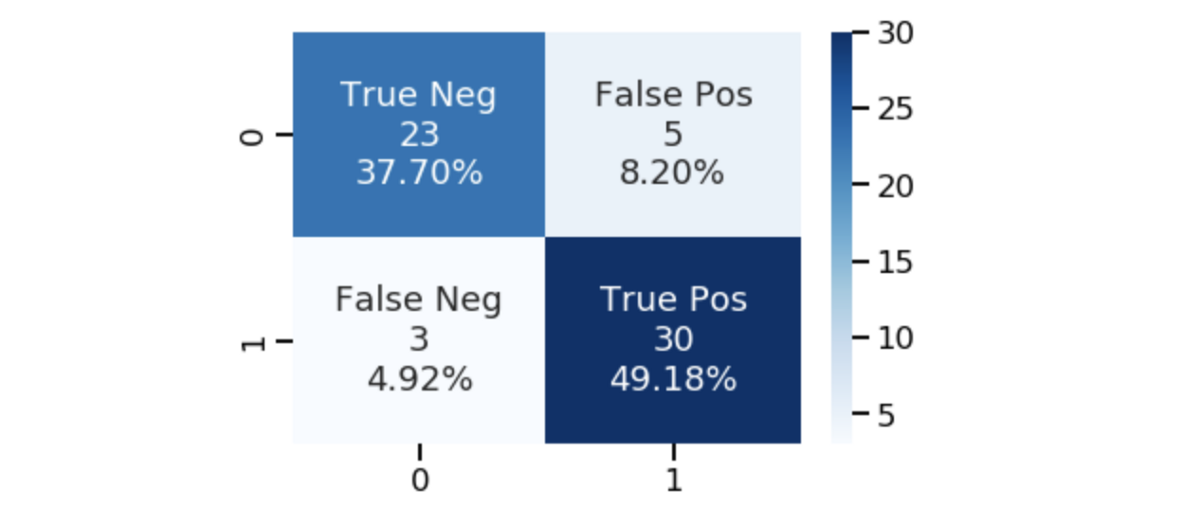

In [84]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [85]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  20.095693779904305
Cross validation score= 18.922496411472974


log loss= 10.779303069162909
hamming loss= 0.3837320574162679


f1 score= 0.4111600587371512
average precision score= 0.2966101694915254
AUC ROC score= 0.598019431063202


label ranking average precision score= 0.4200159489633181
coverage area= 3.4832535885167464




In [86]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[ 77,  81],
        [ 20,  31]],

       [[123,  58],
        [ 17,  11]],

       [[ 80,  78],
        [ 14,  37]],

       [[ 72,  66],
        [ 14,  57]],

       [[152,  49],
        [  4,   4]]])

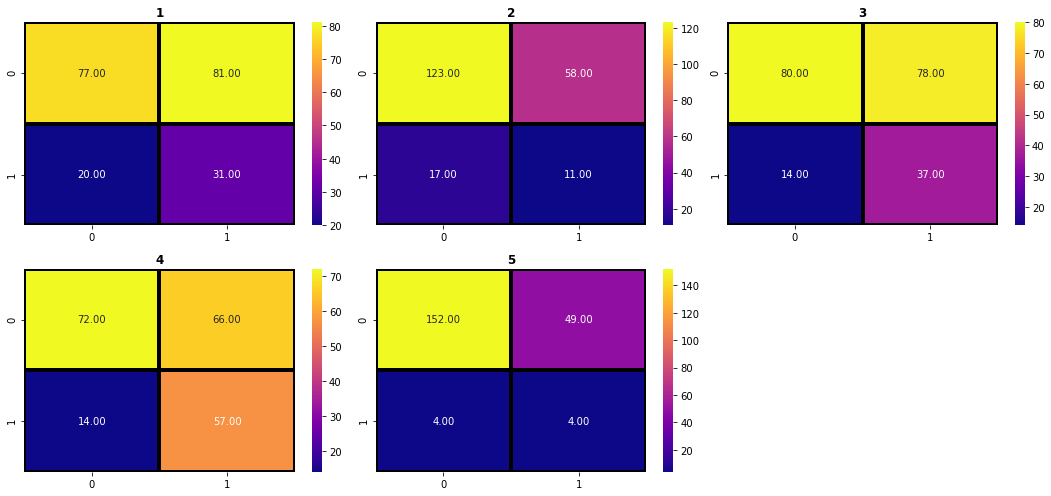

In [87]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [88]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  34.44976076555024
Cross validation score= 29.221354099516084


log loss= 22.640250555515625
hamming loss= 0.26220095693779905


AUC ROC score= 0.6057260475503818
f1 score= 0.3444976076555024
average precision score= 0.3444976076555024


coverage area= 3.6220095693779903
label ranking average precision score= 0.4755980861244031


In [89]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[142,  16],
        [ 31,  20]],

       [[152,  29],
        [ 19,   9]],

       [[132,  26],
        [ 36,  15]],

       [[123,  15],
        [ 47,  24]],

       [[150,  51],
        [  4,   4]]])

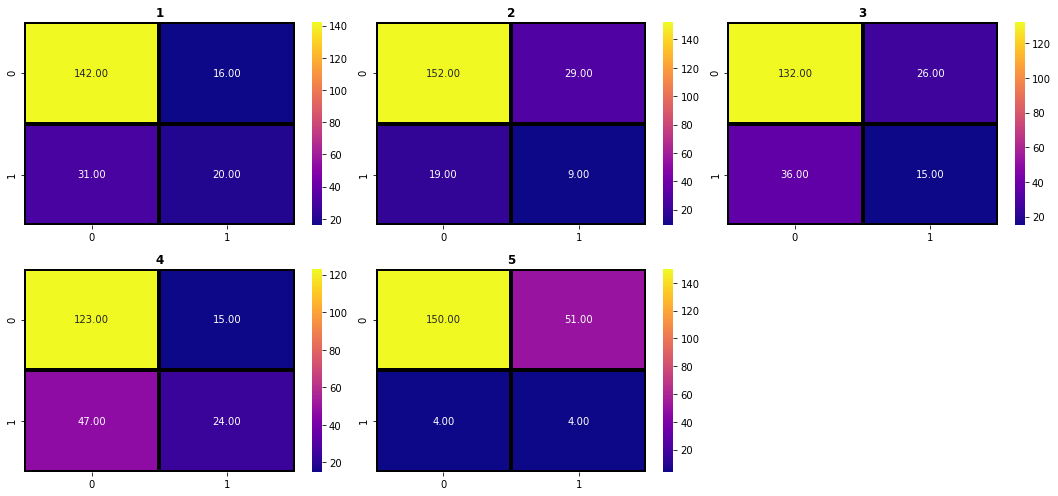

In [90]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [91]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  24.401913875598087
Cross validation score= 21.197665523495182


log loss= 6.100960206322309
hamming loss= 0.18086124401913875


AUC ROC score= 0.5582943059633335
f1 score= 0.3505154639175258
average precision score= 0.6219512195121951


coverage area= 4.023923444976076
label ranking average precision score= 0.3952153110047859


In [92]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[154,   4],
        [ 38,  13]],

       [[181,   0],
        [ 28,   0]],

       [[155,   3],
        [ 49,   2]],

       [[114,  24],
        [ 35,  36]],

       [[201,   0],
        [  8,   0]]])

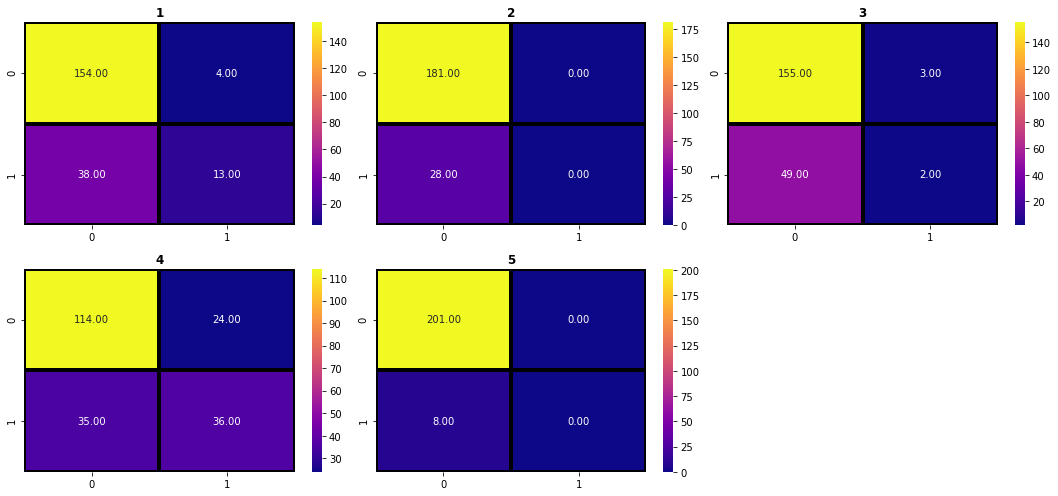

In [93]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [94]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  37.32057416267943
Cross validation score= 34.36949365238992


log loss= 16.217590461565013
hamming loss= 0.22966507177033493


AUC ROC score= 0.5798622158820204
f1 score= 0.46428571428571436
average precision score= 0.4351464435146444


label ranking average precision score= 0.5358851674641159
coverage area= 3.1339712918660285


In [95]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[148,  10],
        [ 35,  16]],

       [[179,   2],
        [ 25,   3]],

       [[130,  28],
        [ 30,  21]],

       [[ 45,  93],
        [  7,  64]],

       [[199,   2],
        [  8,   0]]])

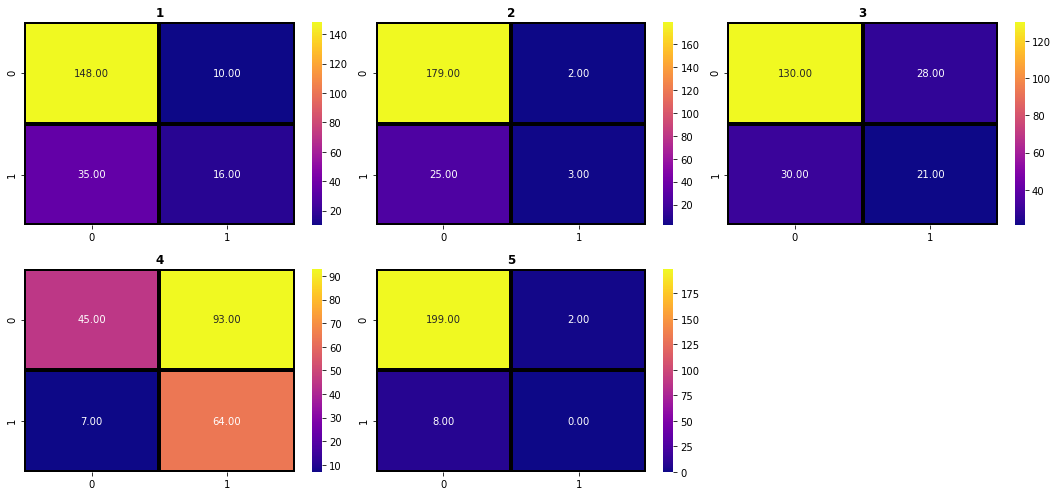

In [96]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [97]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Adapted algorithm,37.320574,34.369494,0.229665,16.217590,0.579862,0.464286,0.435146,3.133971,0.535885
1,Label powerset,34.449761,29.221354,0.262201,22.640251,0.605726,0.344498,0.344498,3.622010,0.475598
2,Classifier chain,24.401914,21.197666,0.180861,6.100960,0.558294,0.350515,0.621951,4.023923,0.395215
3,Binary Relevance,20.095694,18.922496,0.383732,10.779303,0.598019,0.411160,0.296610,3.483254,0.420016


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Binary Relevance is maximum which is 0.61
* The accuracy score of Adapted Algorithm is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [98]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [99]:
z.shape

(28872,)

In [100]:
y.shape

(28872, 5)

In [101]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [102]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [103]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  4.170130229980605
Cross validation score= 3.9519257412025492


log loss= 5.065775897828032
hamming loss= 0.6151842615683014


f1 score= 0.36332874512502866
average precision score= 0.2290807839733854
AUC ROC score= 0.5626228970830516


label ranking average precision score= 0.27410640066501973
coverage area= 4.248822388473261




In [104]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[ 932, 4522],
        [ 217, 1547]],

       [[1562, 5053],
        [ 144,  459]],

       [[ 826, 5146],
        [ 178, 1068]],

       [[1071, 4252],
        [ 201, 1694]],

       [[3162, 2346],
        [ 143, 1567]]])

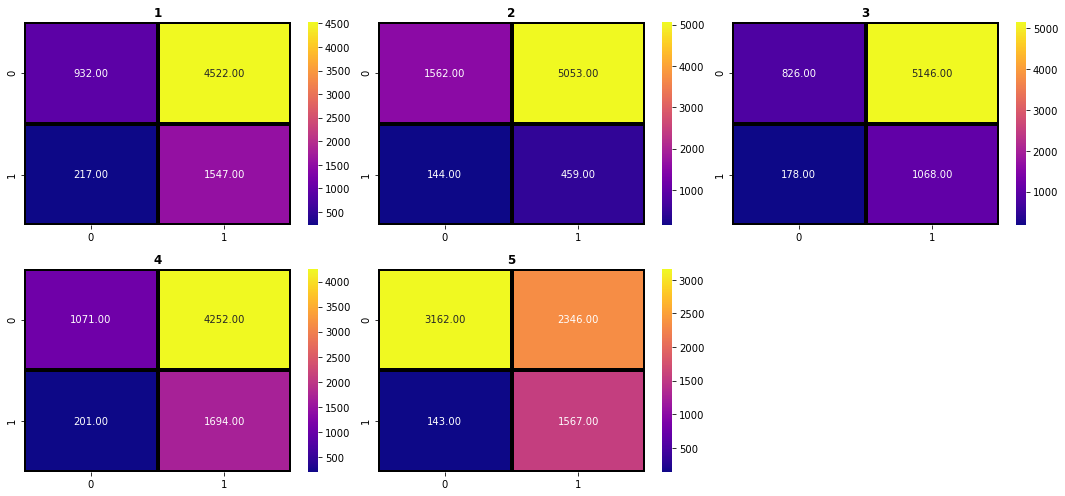

In [105]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [106]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  32.54364089775561
Cross validation score= 32.16957605985037


log loss= 23.298601034472174
hamming loss= 0.26982543640897755


AUC ROC score= 0.5852490345346437
f1 score= 0.3254364089775561
average precision score= 0.3254364089775561


coverage area= 3.6982543640897756
label ranking average precision score= 0.46034912718201126


In [107]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[5297,  157],
        [1581,  183]],

       [[4860, 1755],
        [ 332,  271]],

       [[5666,  306],
        [1106,  140]],

       [[5018,  305],
        [1706,  189]],

       [[3162, 2346],
        [ 144, 1566]]])

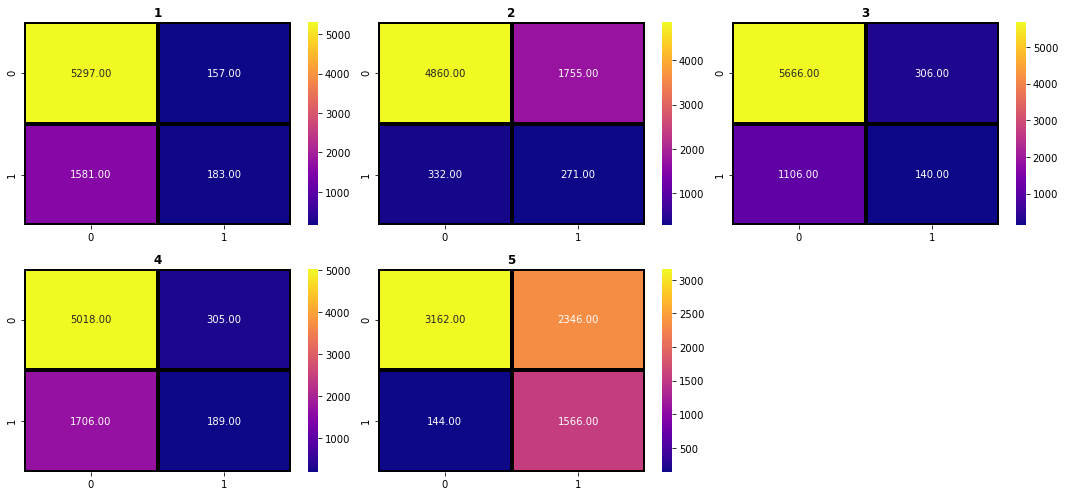

In [108]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [109]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  27.54225547243004
Cross validation score= 25.73081185924078


log loss= 5.262940736948509
hamming loss= 0.16979772790246606


AUC ROC score= 0.5974209606794245
f1 score= 0.3935075217735551
average precision score= 0.6888426888426888


coverage area= 3.8983097811027987
label ranking average precision score= 0.42033804377941425


In [110]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[5297,  157],
        [1065,  699]],

       [[6615,    0],
        [ 603,    0]],

       [[5913,   59],
        [1178,   68]],

       [[5002,  321],
        [1437,  458]],

       [[5147,  361],
        [ 947,  763]]])

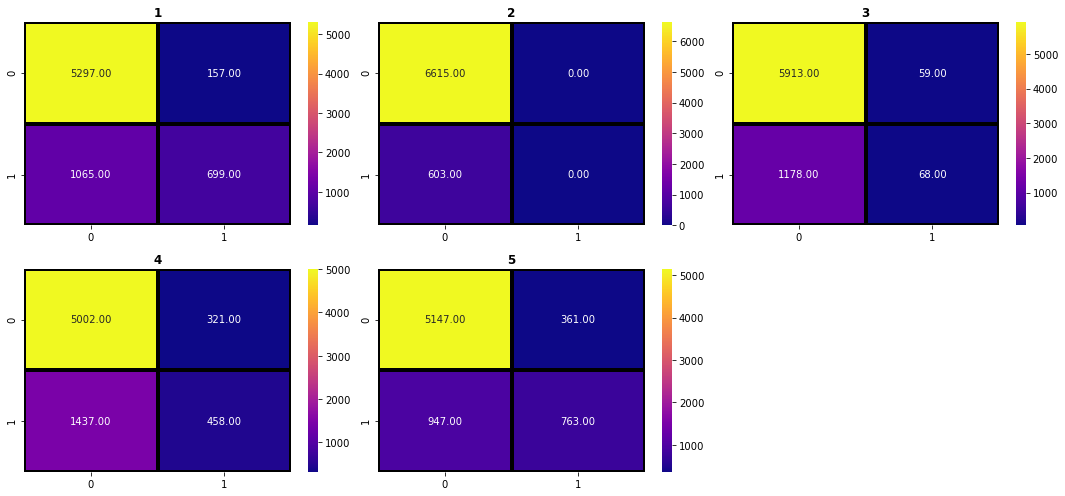

In [111]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [112]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  32.432806871709616
Cross validation score= 33.73164311443613


log loss= 18.79119629396115
hamming loss= 0.2638403990024938


AUC ROC score= 0.6098622170581498
f1 score= 0.41120455107593373
average precision score= 0.3713424167969622


label ranking average precision score= 0.49848988639509234
coverage area= 3.3049321141590466


In [113]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[4466,  988],
        [ 869,  895]],

       [[5869,  746],
        [ 476,  127]],

       [[4831, 1141],
        [ 883,  363]],

       [[3453, 1870],
        [1047,  848]],

       [[4624,  884],
        [ 618, 1092]]])

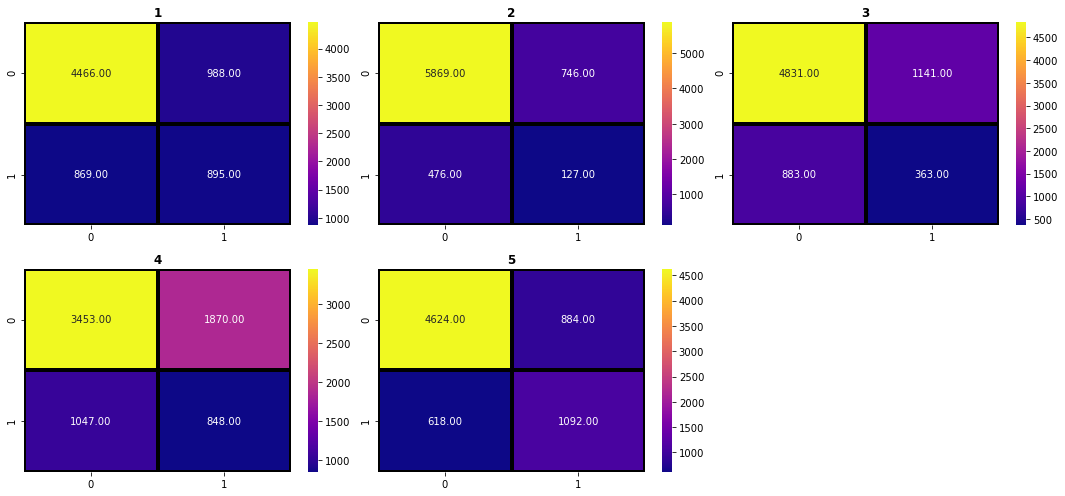

In [114]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [115]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Label powerset,32.543641,32.169576,0.269825,23.298601,0.585249,0.325436,0.325436,3.698254,0.460349
1,Adapted algorithm,32.432807,33.731643,0.263840,18.791196,0.609862,0.411205,0.371342,3.304932,0.498490
2,Classifier chain,27.542255,25.730812,0.169798,5.262941,0.597421,0.393508,0.688843,3.898310,0.420338
3,Binary Relevance,4.170130,3.951926,0.615184,5.065776,0.562623,0.363329,0.229081,4.248822,0.274106


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Binary Relevance.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.6.
* The AUC ROC score for Classifier Chain and Adapted Algorithm are almost equal.
* The accuracy score of Label Powerset is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [116]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,20.095694,18.922496,0.383732,10.779303,0.598019,0.411160,0.296610,3.483254,0.420016,Heading
1,Classifier chain,24.401914,21.197666,0.180861,6.100960,0.558294,0.350515,0.621951,4.023923,0.395215,Heading
2,Label powerset,34.449761,29.221354,0.262201,22.640251,0.605726,0.344498,0.344498,3.622010,0.475598,Heading
3,Adapted algorithm,37.320574,34.369494,0.229665,16.217590,0.579862,0.464286,0.435146,3.133971,0.535885,Heading
0,Binary Relevance,4.170130,3.951926,0.615184,5.065776,0.562623,0.363329,0.229081,4.248822,0.274106,Review
1,Classifier chain,27.542255,25.730812,0.169798,5.262941,0.597421,0.393508,0.688843,3.898310,0.420338,Review
2,Label powerset,32.543641,32.169576,0.269825,23.298601,0.585249,0.325436,0.325436,3.698254,0.460349,Review
3,Adapted algorithm,32.432807,33.731643,0.263840,18.791196,0.609862,0.411205,0.371342,3.304932,0.498490,Review


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss is least by Classifier Chain for heading of reviews and Binary Relevance for reviews. 
* The AUC ROC Score by Binary Relevanve is maximum for heading and by Adapted Algorithm for reviews.
* The accuracy is best by Adapted ALgorithm for heading of reviews and Label Powerset for reviews. 

# Saving Best Model

In [118]:
# saving classifier chain as our best model
import pickle
filename="Review_Classification_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))